In [22]:
%matplotlib notebook

In [41]:
# import dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# add 2011 crime data
homicide = pd.read_csv("Data/homicide.csv", encoding="utf-8") 
homicide.head()

,CASE #,Date of Occurance,Primary Description,Description,Beat,Ward,Year,Latitude,Longitude
0,HT405253,07/19/2011 04:00:00 PM,HOMICIDE,FIRST DEGREE MURDER,732,6.0,2011,41.766565,-87.638386
1,HT578691,11/07/2011 12:05:00 PM,HOMICIDE,FIRST DEGREE MURDER,2123,4.0,2011,41.822200,-87.602135
2,HT576092,11/05/2011 01:50:00 PM,HOMICIDE,FIRST DEGREE MURDER,1122,28.0,2011,41.877169,-87.719061
3,HT581763,11/09/2011 02:00:00 PM,HOMICIDE,FIRST DEGREE MURDER,522,34.0,2011,41.688889,-87.628242
4,HT582731,11/10/2011 02:40:00 AM,HOMICIDE,FIRST DEGREE MURDER,614,18.0,2011,41.741304,-87.659690


In [34]:
year_group = homicide.groupby("Year")
year_plot = year_group['CASE #'].count().reset_index()
year_plot

,Year,CASE #
0,2001,667
1,2006,477
2,2011,438
3,2016,788
4,2020,813


<IPython.core.display.Javascript object>


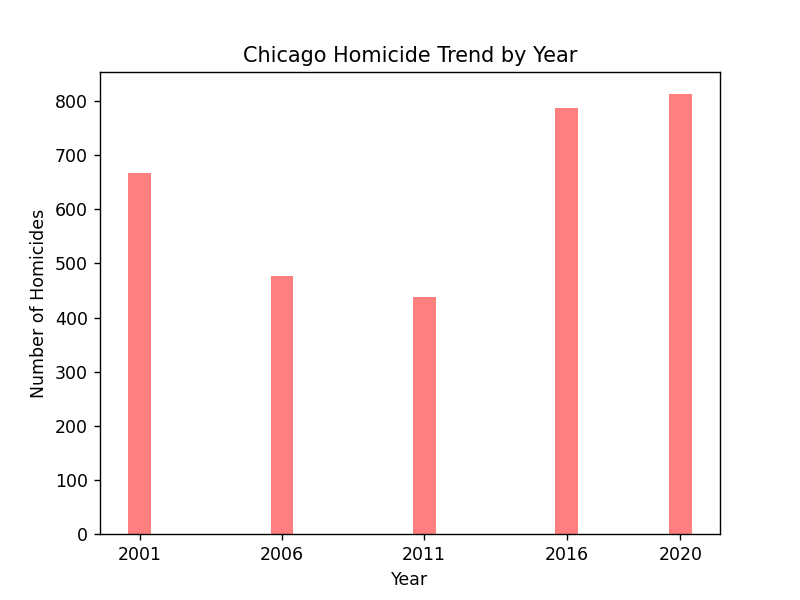

Text(0, 0.5, 'Number of Homicides')

In [37]:
# set the coordiantes for the graph
y_axis = year_plot['CASE #']
x_axis = year_plot['Year']

#plot the graph
plt.bar(x_axis, y_axis, color='r', alpha=.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

# Give our chart some labels and a tile
plt.title("Chicago Homicide Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Homicides")